# 2. Extract Features and Labels for Individuals

This notebook contains the workflow for the second milestone in the Manning liveProject *Handling Sensitive Data.*

In [1]:
import pandas as pd
import numpy as np
from scipy.fft import fft
import os.path
from scipy.io import wavfile
import matplotlib.pyplot as plt

## Read data (copied from milestone 1)

In [2]:
csvpath = "../../data/" # path to csv file
wavpath = "../../data/Recordings/" # path to the folder with wav files

In [3]:
# import metadata
meta = pd.read_csv(csvpath + "Covid19Study_June2021.csv", delimiter=";") 

# importing the wav files
wavdata = []

for pid in meta["ParticipantID"].values:
    if os.path.isfile(wavpath + "RecordingParticipant" + str(pid) +".wav"):
        _, data = wavfile.read(wavpath + "RecordingParticipant" + str(pid) +".wav") # note: the wav files are 16-bit integer PCM
    else:
        sample_rate = 44100
        data = np.zeros((10000,))
    wavdata.append(np.array(data))

## Doing Fourier transform and creating feature matrix X
The plot below is the feature vectors for the first 4 participants.

In [4]:
raw_last8192 = [wav[-8192:] for wav in wavdata] # extract the last 8192 sample values from each recording
fft_last8192 = [np.abs(fft(rawwav)) for rawwav in raw_last8192] # get the absolute Fourier transformed values

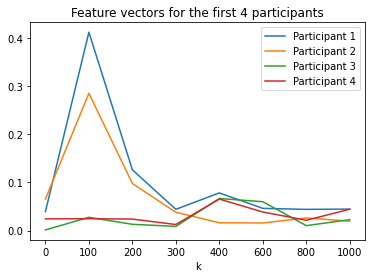

In [5]:
bins = [0,100,200,300,400,600,800,1000]
X = np.zeros((len(fft_last8192), len(bins))) # array to store feature vectors

fig, ax = plt.subplots()

# normalize the absolute Fourier transformed values for indices listed in bins
# and plot 
for i in range(len(fft_last8192)):
    X[i,:] = fft_last8192[i][bins] / np.max(fft_last8192[i])
    if i in range(4): 
        # plot the feature vectors of participants 1-4
        ax.plot(np.arange(len(bins)), X[i,:],label="Participant %d" % (i+1))

# some settings for the plot
ax.set_title("Feature vectors for the first 4 participants")
ax.set_xticks(range(len(bins)))
ax.set_xlabel("k")
ax.set_xticklabels(bins)    
plt.legend()
plt.show()

## Creating labels y

In [6]:
# creating y from the dataframe values
y = np.array(meta["Covid19"].copy())
y = np.where(y=="y",1,-1)
y = y.reshape(-1,1)

## Some sanity checks

In [7]:
# Sanity checks
print("*******Sanity checks*******")
print("number of (unique) participants:", meta.ParticipantID.unique().shape[0])
print("X.shape =", X.shape)
print("y.shape =", y.shape)
print("unique values of y:", np.unique(y))

*******Sanity checks*******
number of (unique) participants: 200
X.shape = (200, 8)
y.shape = (200, 1)
unique values of y: [-1  1]
